<h1 style='color:blue' align='center'>CIFAR10 Image Classification Using Convolutional Neural Network (CNN) Architecture - Tensorflow</h1>

Problem Formulation:

This is a **deep learning** problem

that has been solved using **CNN architecture**

on **tensorflow** platform

Dataset: CIFAR10

Steps:

1. Download Dataset CIFAR10

2. Spliting (Train, Test, Val)

3. Pre-processing (Normalization, Data Augmentation)

4. ANN Baseline (Accuracy, Loss, Classification Report)

5. Custom CNN Archtecture Trained from Scratch 
    <ol>
    <li> Training
    <li> Hyper Parameter Tuning (Learning Rate, Optimizer)
    <li> Evaluation (Accuracy, Loss, Classification Report, Confusion Matrix, Sample Prediction and Wrong Predictions)
    <li>Saving the Model (Summary)
    </ol>

6. Finetuning VGG19 (ImageNet Challenge) on CIFAR10
    <ol>
    <li> Training
    <li> Hyper Parameter Tuning (Learning Rate, Optimizer)
    <li> Evaluation (Accuracy, Loss, Classification Report, Confusion Matrix, Sample Prediction and Wrong Predictions)
    </ol>


![Picture example](https://miro.medium.com/max/505/1*r8S5tF_6naagKOnlIcGXoQ.png)

<h2 style="color:purple" >Import all required libraries</h2>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers

import matplotlib.pyplot as plt
import numpy as np

<h2 style="color:purple" >Load the dataset</h2>

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

**Here we see there are 50000 training images and 1000 test images**

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

**y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array**

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

**Here , we plotted a distribution plot for training and testing set**

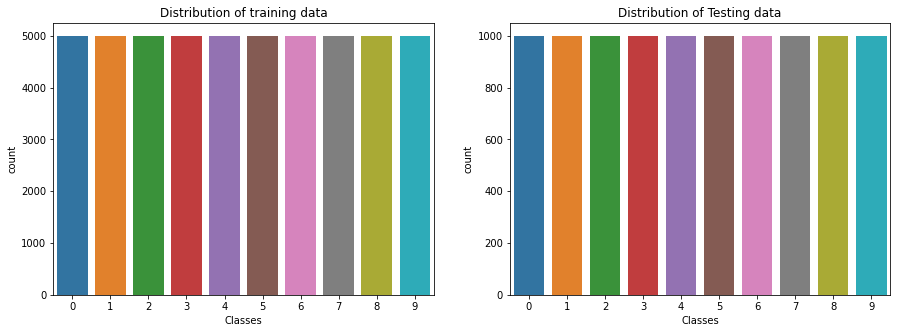

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
fig, axs = plt.subplots(1,2,figsize=(15,5)) 

# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')

# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')


from google.colab import files
#plt.savefig("/content/gdrive/MyDrive/ML_sem_2_2022/Sub_Group1/Code/images/distribution_plot.png")

plt.show()

**Let's plot some images to see what they are**

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

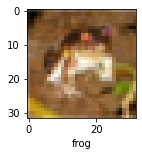

In [ ]:
plot_sample(X_train, y_train, 0)

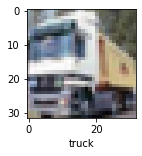

In [ ]:
plot_sample(X_train, y_train, 1)

# Pre-processing

<h4 style="color:purple">Normalizing the training data</h4>

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#z-score
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)

#X_train = X_train / 255.0
#X_test = X_test / 255.0

#from keras.utils import np_utils
#y_train = np_utils.to_categorical(y_train,10)
#y_test = np_utils.to_categorical(y_test,10)

# Creating Validation Set

In [ ]:
X_val = X_train[-2500:]
y_val = y_train[-2500:]
X_train = X_train[:-2500]
y_train = y_train[:-2500]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


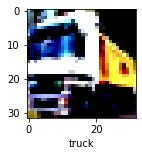

In [ ]:
plot_sample(X_train, y_train, 1)

# Baseline ANN for Comparision 

In [ ]:

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=ann.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


#print()

Epoch 1/50
1485/1485 [==============================] - 8s 4ms/step - loss: 1.6272 - accuracy: 0.4291 - val_loss: 1.4826 - val_accuracy: 0.4872
Epoch 2/50
1485/1485 [==============================] - 5s 3ms/step - loss: 1.3285 - accuracy: 0.5415 - val_loss: 1.3900 - val_accuracy: 0.5188
Epoch 3/50
1485/1485 [==============================] - 5s 3ms/step - loss: 1.1712 - accuracy: 0.5984 - val_loss: 1.3669 - val_accuracy: 0.5356
Epoch 4/50
1485/1485 [==============================] - 5s 4ms/step - loss: 1.0381 - accuracy: 0.6464 - val_loss: 1.3453 - val_accuracy: 0.5400
Epoch 5/50
1485/1485 [==============================] - 5s 3ms/step - loss: 0.9158 - accuracy: 0.6951 - val_loss: 1.5503 - val_accuracy: 0.5076
Epoch 6/50
1485/1485 [==============================] - 5s 4ms/step - loss: 0.7999 - accuracy: 0.7352 - val_loss: 1.3870 - val_accuracy: 0.5368
Epoch 7/50
1485/1485 [==============================] - 5s 4ms/step - loss: 0.6922 - accuracy: 0.7737 - val_loss: 1.3940 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np


y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))



#print()

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.70      0.67      1000
           1       0.71      0.65      0.68      1000
           2       0.46      0.46      0.46      1000
           3       0.39      0.42      0.41      1000
           4       0.49      0.51      0.50      1000
           5       0.48      0.48      0.48      1000
           6       0.62      0.59      0.61      1000
           7       0.63      0.60      0.61      1000
           8       0.70      0.69      0.70      1000
           9       0.62      0.64      0.63      1000

    accuracy                           0.57     10000
   macro avg       0.58      0.57      0.57     10000
weighted avg       0.58      0.57      0.57     10000



# Constructing a CNN Architecture from Scratch

## Pre-processing for CNN

In [ ]:
'Import the datagenerator to augment images'
from keras.preprocessing.image import ImageDataGenerator

'''Import the optimizers and leanring rate annealer (which will reduce the learning rate once a particular metric we choose(in this case validation error) 
does not reduce after a user defined number of epochs)'''
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau


In [ ]:

#Data Augmentation Function: Let's define an instance of the ImageDataGenerator class and set the parameters.We have to instantiate for the Train,Validation and Test datasets
train_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1 )

val_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1)

test_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip= True,
                                    zoom_range=.1) 

In [ ]:
train_generator.fit(X_train)
val_generator.fit(X_val)
test_generator.fit(X_test)

In [ ]:

weight_decay = 1e-4

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding="SAME", kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="SAME",kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="SAME", kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="SAME", kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid'),
    layers.Dropout(0.4),


    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="SAME", kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="SAME", kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid'),
    layers.Dropout(0.4),
    
    
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(64, activation='selu'),
    #layers.Dropout(0.5),
    layers.Dense(64, activation='selu'),
    #layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [ ]:
lrr= ReduceLROnPlateau(
                       monitor='accuracy', #Metric to be measured
                       factor=.01, #Factor by which learning rate will be reduced
                       patience=3,  #No. of epochs after which if there is no improvement in the val_acc, the learning rate is reduced
                       min_lr=1e-5) #The minimum learning rate 

In [ ]:

#optimizer=tf.keras.optimizers.RMSprop(1e-3)
batch_size= 128
epochs=50
learn_rate=.0001

sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate, 
          beta_1=0.9, 
          beta_2=0.999, 
          #epsilon=None, 
          decay=0.0, 
          amsgrad=False)

#optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

optimizer=adam

In [ ]:
cnn.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
history=cnn.fit(
                train_generator.flow(X_train,y_train,batch_size=batch_size),
                epochs=epochs,
                steps_per_epoch=X_train.shape[0]//batch_size,
                validation_data=val_generator.flow(X_val,y_val,batch_size=batch_size),
                validation_steps=5,
                callbacks=[lrr],
                verbose=1)

Epoch 1/50
371/371 [==============================] - 21s 58ms/step - loss: 1.6092 - accuracy: 0.4277 - val_loss: 1.9049 - val_accuracy: 0.3672 - lr: 1.0000e-04
Epoch 2/50
371/371 [==============================] - 22s 58ms/step - loss: 1.4654 - accuracy: 0.4832 - val_loss: 1.7224 - val_accuracy: 0.4234 - lr: 1.0000e-04
Epoch 3/50
371/371 [==============================] - 22s 58ms/step - loss: 1.3746 - accuracy: 0.5179 - val_loss: 1.6309 - val_accuracy: 0.4641 - lr: 1.0000e-04
Epoch 4/50
371/371 [==============================] - 22s 60ms/step - loss: 1.2875 - accuracy: 0.5507 - val_loss: 1.5299 - val_accuracy: 0.4891 - lr: 1.0000e-04
Epoch 5/50
371/371 [==============================] - 22s 58ms/step - loss: 1.2023 - accuracy: 0.5811 - val_loss: 1.2883 - val_accuracy: 0.5406 - lr: 1.0000e-04
Epoch 6/50
371/371 [==============================] - 22s 58ms/step - loss: 1.1322 - accuracy: 0.6084 - val_loss: 1.1433 - val_accuracy: 0.6297 - lr: 1.0000e-04
Epoch 7/50
371/371 [==============

In [ ]:
#history=cnn.fit(X_train, y_train, epochs=50)

"""
print("Fit model on training data")
history = cnn.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=20,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val)
)"""

**Saving the Model so it need not be trained again**

In [ ]:
#cnn.save('saved_model/DL_development_cnn_model.h5', include_optimizer=True)

#Code to Load

# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('saved_model/DL_development_cnn_model.h5')
# summarize model.
model.summary()


OSError: ignored

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 22s 5ms/step - loss: 0.6346 - accuracy: 0.8145


[0.6346233487129211, 0.8144999742507935]

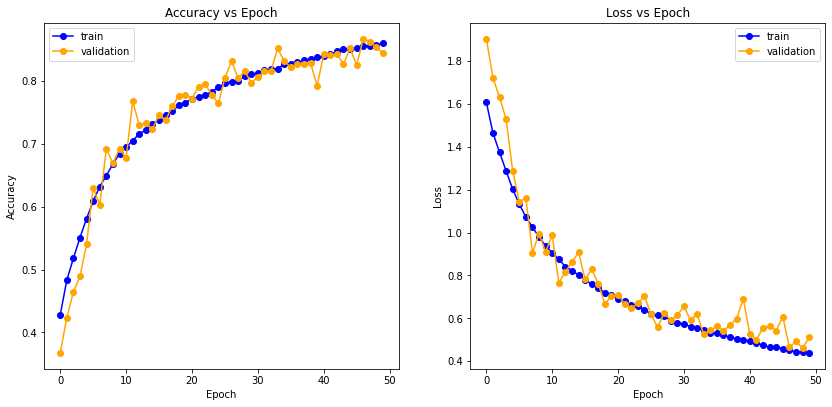

In [ ]:
#history.history
label=["train","validation"]
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

lss=history.history['loss']
val_lss=history.history['val_loss']

plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
plt.title("Accuracy vs Epoch")
plt.plot(acc, color="b", marker='o')
plt.plot(val_acc, color="orange", marker='o')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(labels=label)

plt.subplot(2,2,2)
plt.title("Loss vs Epoch")
plt.plot(lss, marker="o", color='b')
plt.plot(val_lss, marker="o", color='orange')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(labels=label)


#from google.colab import files
#plt.savefig("/content/gdrive/MyDrive/ML_sem_2_2022/Sub_Group1/Code/images/acc&loss_versus_epochs.png")

plt.show()

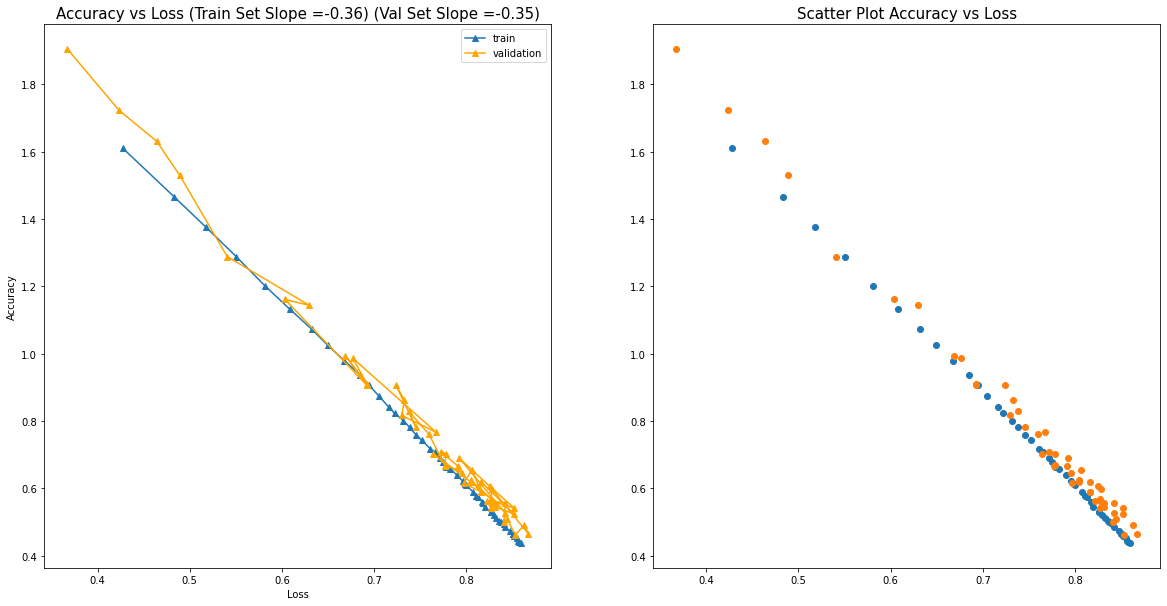

In [ ]:
#plt.scatter(x=acc, y=lss)
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(lss, acc)
valslope, valintercept, valr_value, valp_value, valstd_err = linregress(val_lss, val_acc)


plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title(f"Accuracy vs Loss (Train Set Slope ={round(slope, 2)}) (Val Set Slope ={round(valslope, 2)})", fontsize=15)
plt.plot(acc, 
         lss, 
         marker="^", 
         #markerfacecolor="magenta", 
         #markeredgecolor="magenta"
         )
plt.xlabel("Loss")
plt.ylabel("Accuracy")

plt.plot(val_acc, 
         val_lss, 
         marker="^", 
         #markerfacecolor="magenta", 
         #markeredgecolor="magenta", 
         color="orange")
plt.legend(labels=["train","validation"])


plt.subplot(1,2,2)

plt.title(f"Scatter Plot Accuracy vs Loss", fontsize=15)


plt.scatter(acc, lss)

plt.scatter(val_acc, val_lss)

#from google.colab import files
#plt.savefig("/content/gdrive/MyDrive/ML_sem_2_2022/Sub_Group1/Code/images/acc_vs_loss.png")

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib



In [ ]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

#labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(y_pred, axis=1) 

# Convert validation observations to one hot vectors
Y_true = y_test

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = y_pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = X_test[errors]



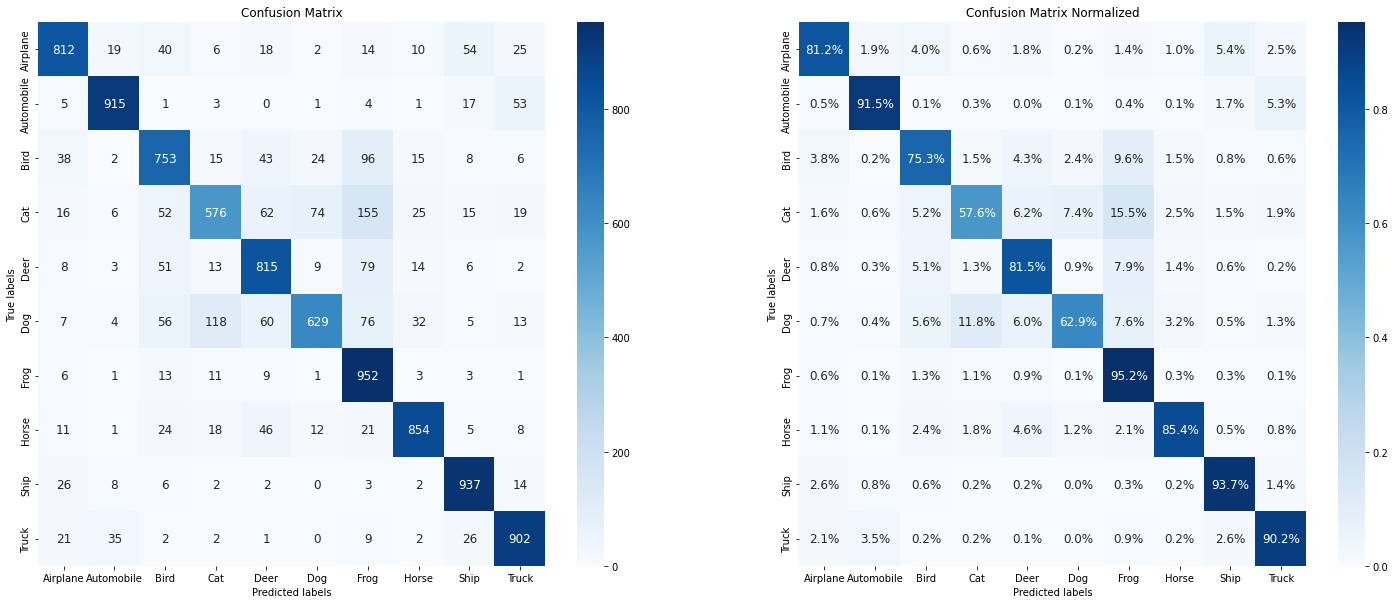

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

plt.figure(figsize=(25,10))
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


ax= plt.subplot(1,2,1)
cf_matrix=confusion_matrix(Y_true, Y_pred_classes)
sns.heatmap(cf_matrix, 
            annot=True, 
            fmt="d",
            cmap="Blues",
            ax=ax,
            annot_kws={'size': 12}
            )

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels)

ax= plt.subplot(1,2,2)
cf_matrix=confusion_matrix(Y_true, Y_pred_classes, normalize="true")
sns.heatmap(cf_matrix, 
            annot=True, 
            fmt=".1%",
            cmap="Blues",
            ax=ax,
            annot_kws={'size': 12}
            )

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Normalized') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels)


#from google.colab import files
#plt.savefig("/content/gdrive/MyDrive/ML_sem_2_2022/Sub_Group1/Code/images/confusion_matrix.png")

plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.85      0.81      0.83      1000
  automobile       0.92      0.92      0.92      1000
        bird       0.75      0.75      0.75      1000
         cat       0.75      0.58      0.65      1000
        deer       0.77      0.81      0.79      1000
         dog       0.84      0.63      0.72      1000
        frog       0.68      0.95      0.79      1000
       horse       0.89      0.85      0.87      1000
        ship       0.87      0.94      0.90      1000
       truck       0.86      0.90      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

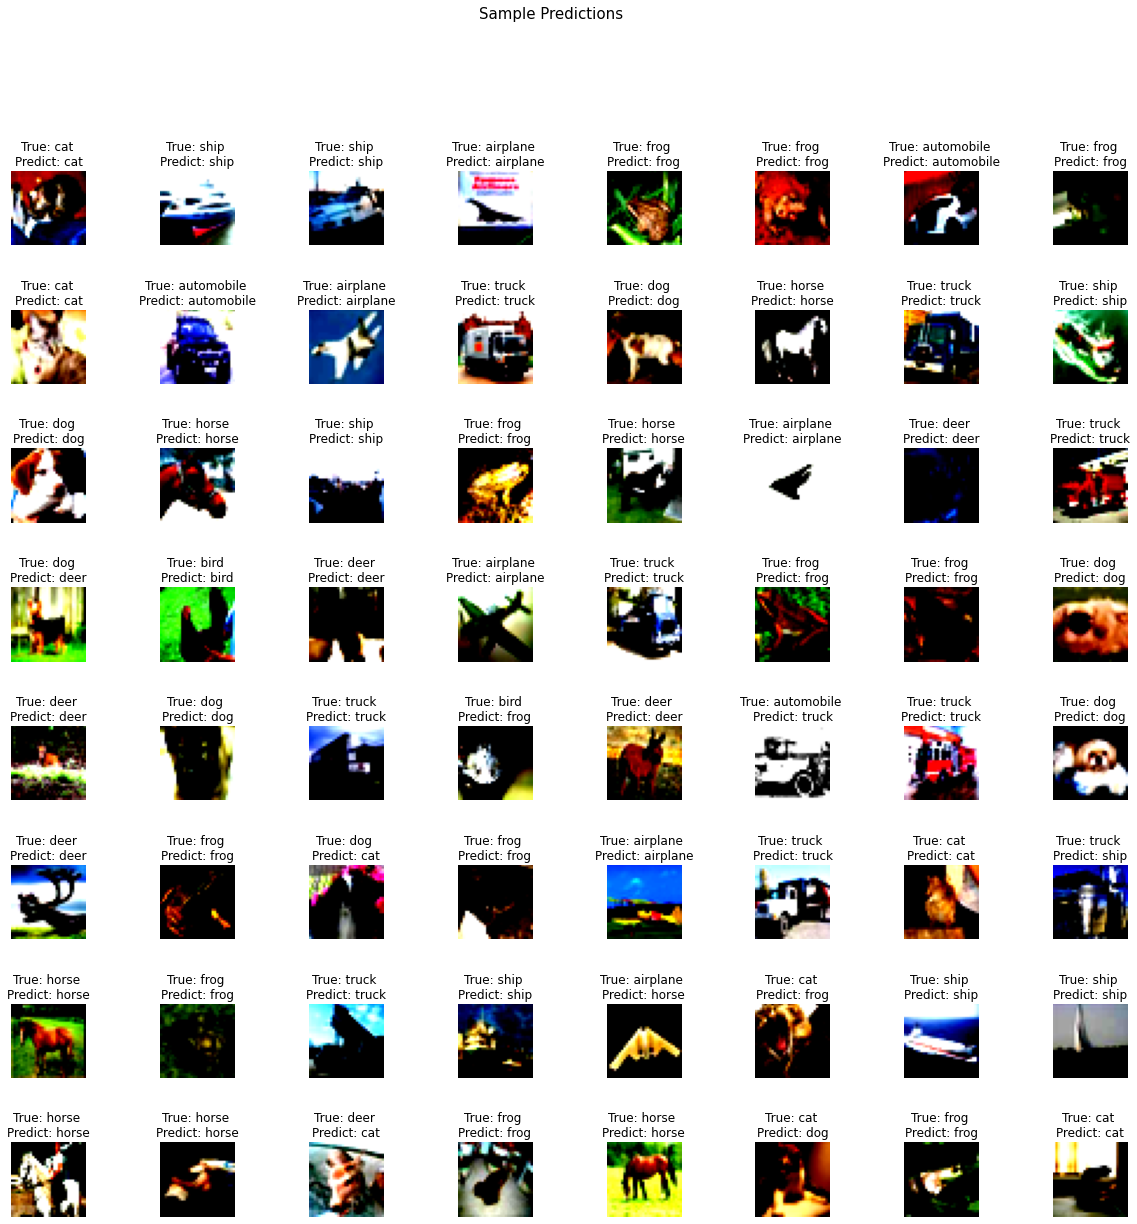

In [ ]:
R = 8
C = 8
fig, axes = plt.subplots(R, C, figsize=(20,20))
fig.suptitle("Sample Predictions", fontsize=15)
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (classes[y_test[i]], classes[y_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

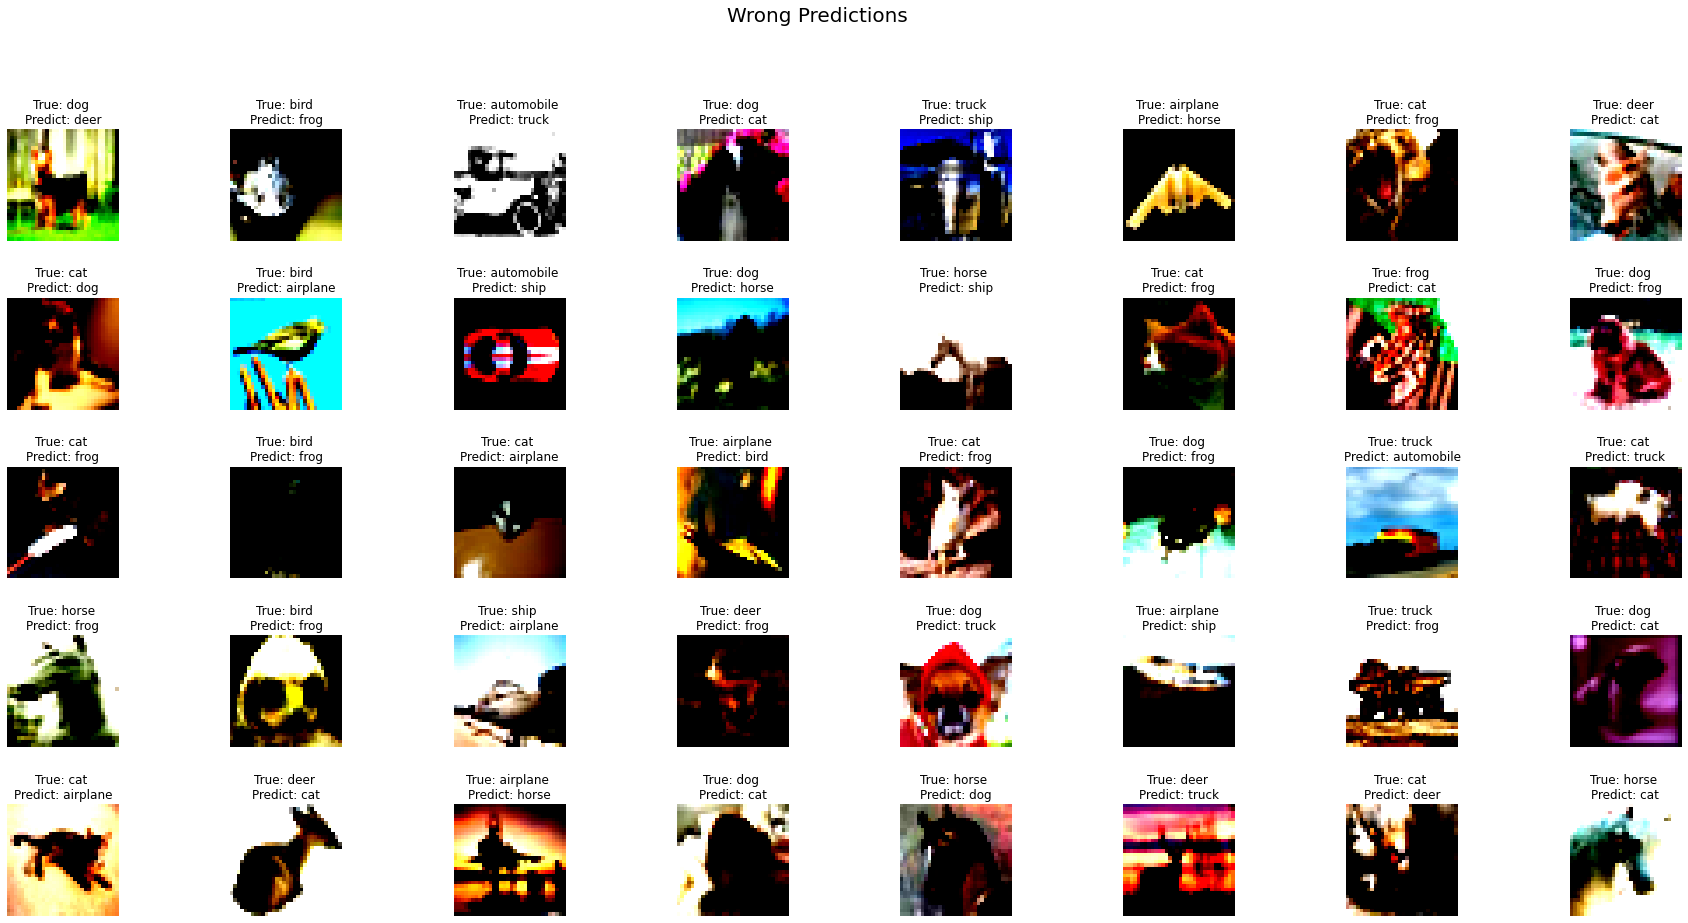

In [ ]:
R = 5
C = 8
fig, axes = plt.subplots(R, C, figsize=(30,15))
fig.suptitle("Wrong Predictions", fontsize=20)


axes = axes.ravel()
count=0

for i in range(0,10000):
  if(errors[i]==True):
    plt.subplots_adjust(wspace=1)
    axes[count].imshow(X_test[i])
    axes[count].set_title("True: %s \nPredict: %s" % (classes[Y_true[i]], classes[y_classes[i]]))
    axes[count].axis('off')
    count=count+1

    
  if count>=R*C:
    break

#from google.colab import files
#plt.savefig("/content/gdrive/MyDrive/ML_sem_2_2022/Sub_Group1/Code/images/wrong_predictions.png")

plt.show()




# Transfer Learning Using VGG-19

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.utils.multiclass import unique_labels
import os

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
#Import keras functions

from keras import Sequential
from keras.applications.vgg19 import VGG19
#from keras.applications.resnet50 import ResNet50

'Import the datagenerator to augment images'
from keras.preprocessing.image import ImageDataGenerator

'''Import the optimizers and leanring rate annealer (which will reduce the learning rate once a particular metric we choose(in this case validation error) does not reduce after a user defined number of epochs)'''
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau

'Lastly import the final layers that will be added on top of the base model'
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout

'Import to_categorical from the keras utils package to one hot encode the labels'
from tensorflow.keras.utils import to_categorical

In [ ]:
#Import dataset
from keras.datasets import cifar10

In [ ]:
#Divide the data in Train, Validation and Test Datasets
'I had to turn the Internet setting to on to download load the dataset'
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

#X_train = X_train / 255.0
#X_test = X_test / 255.0

#from keras.utils import np_utils
#y_train = np_utils.to_categorical(y_train,10)

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)


In [ ]:
#Print the dimensions of the datasets to make sure everything's kosher

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
# Lets print the dimensions one more time to see if things changed the way we expected

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
#Data Augmentation Function: Let's define an instance of the ImageDataGenerator class and set the parameters.We have to instantiate for the Train,Validation and Test datasets
train_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1 )

val_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1)

test_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip= True,
                                    zoom_range=.1) 

In [ ]:
#Fit the augmentation method to the data

train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [ ]:
'''Learning Rate Annealer: The learning rate can be modified after a set number of epochs or after a certain condition is met. We will use the latter and change the learning rate if 
the validation error does not reduce after a set number of epochs. To do this we will use the patience parameter.'''

lrr= ReduceLROnPlateau(
                       monitor='accuracy', #Metric to be measured
                       factor=.01, #Factor by which learning rate will be reduced
                       patience=3,  #No. of epochs after which if there is no improvement in the val_acc, the learning rate is reduced
                       min_lr=1e-5) #The minimum learning rate 

In [ ]:
#Build the model

'The first base model used is VGG19. The pretrained weights from the imagenet challenge are used'
base_model_1 = VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])


80150528/80134624 [==============================] - 2s 0us/step


In [ ]:
#Lets add the final layers to these base models where the actual classification is done in the dense layers

model_1= Sequential()

model_1.add(base_model_1) #Adds the base model (in this case vgg19 to model_1)

model_1.add(Flatten()) #Since the output before the flatten layer is a matrix we have to use this function to get a vector of the form nX1 to feed it into the fully connected layers

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
Total params: 20,024,384
Trainable params: 20,024,384
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dense(256,activation=('relu'))) 
model_1.add(Dropout(.3))

#Adding a dropout layer that will randomly drop 30% of the weights
model_1.add(Dense(128,activation=('relu')))
model_1.add(Dropout(.2))

model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

In [ ]:
batch_size= 128
epochs=50
learn_rate=.0001

sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)

adam=Adam(learning_rate=learn_rate, 
          beta_1=0.9, 
          beta_2=0.999, 
          #epsilon=None, 
          decay=0.0, 
          amsgrad=False)

In [ ]:
#Compile the model
#During model compiling the 3 main things we specify are loss function,optimizer and the metrics that need to be evaluated during the test and train processes.
#Lets start by using the SGD optimizer
#We will specify the loss as categoricl crossentropy since the labels are 1 hot encoded. IF we had integer labels,we'd have to use sparse categorical crossentropy as loss function.


model_1.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hisotry=model_1.fit(train_generator.flow(x_train,y_train,batch_size=batch_size),
                    epochs=epochs,
                    steps_per_epoch=x_train.shape[0]//batch_size,
                    validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size),
                    validation_steps=50,
                    callbacks=[lrr],
                    verbose=1)

Epoch 1/50
273/273 [==============================] - 27s 89ms/step - loss: 1.2742 - accuracy: 0.5650 - val_loss: 0.8013 - val_accuracy: 0.7361 - lr: 1.0000e-04
Epoch 2/50
273/273 [==============================] - 24s 87ms/step - loss: 0.7883 - accuracy: 0.7511 - val_loss: 0.7362 - val_accuracy: 0.7561 - lr: 1.0000e-04
Epoch 3/50
273/273 [==============================] - 27s 98ms/step - loss: 0.6349 - accuracy: 0.7959 - val_loss: 0.5828 - val_accuracy: 0.8039 - lr: 1.0000e-04
Epoch 4/50
273/273 [==============================] - 23s 86ms/step - loss: 0.5544 - accuracy: 0.8218 - val_loss: 0.6131 - val_accuracy: 0.7936 - lr: 1.0000e-04
Epoch 5/50
273/273 [==============================] - 24s 86ms/step - loss: 0.4869 - accuracy: 0.8431 - val_loss: 0.5254 - val_accuracy: 0.8259 - lr: 1.0000e-04
Epoch 6/50
273/273 [==============================] - 24s 86ms/step - loss: 0.4272 - accuracy: 0.8636 - val_loss: 0.5344 - val_accuracy: 0.8302 - lr: 1.0000e-04
Epoch 7/50
273/273 [==============

In [ ]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.8885 - accuracy: 0.8785


[0.8885002136230469, 0.8784999847412109]

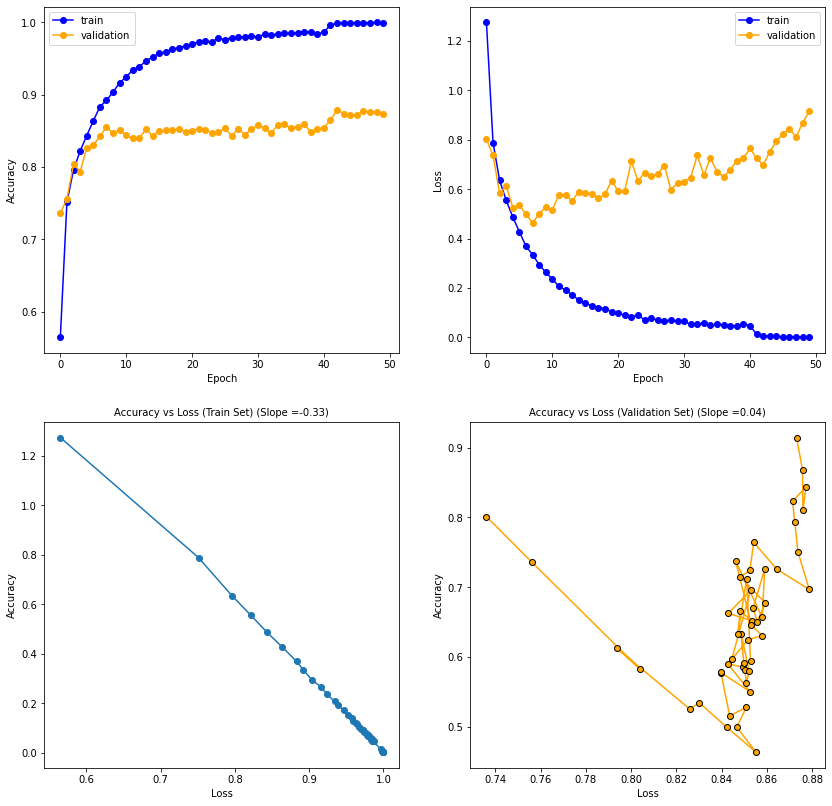

In [ ]:
#history.history
history=hisotry
label=["train","validation"]
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

lss=history.history['loss']
val_lss=history.history['val_loss']

plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
plt.plot(acc, color="b", marker='o')
plt.plot(val_acc, color="orange", marker='o')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(labels=label)

plt.subplot(2,2,2)
plt.plot(lss, marker="o", color='b')
plt.plot(val_lss, marker="o", color='orange')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(labels=label)


#plt.scatter(x=acc, y=lss)
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(lss, acc)

#plt.figure(figsize=(20,10))
plt.subplot(2,2,3)
plt.title(f"Accuracy vs Loss (Train Set) (Slope ={round(slope, 2)})", fontsize=10)
plt.plot(acc, 
         lss, 
         marker="o", 
         #markerfacecolor="magenta", 
         #markeredgecolor="magenta"
         )
plt.xlabel("Loss")
plt.ylabel("Accuracy")


plt.subplot(2,2,4)
slope, intercept, r_value, p_value, std_err = linregress(val_lss, val_acc)
plt.title(f"Accuracy vs Loss (Validation Set) (Slope ={round(slope, 2)})", fontsize=10)
plt.plot(val_acc, 
         val_lss, 
         marker="o", 
         #markerfacecolor="magenta", 
         markeredgecolor="black", 
         color="orange")
#plt.legend(labels=["train","validation"])
plt.xlabel("Loss")
plt.ylabel("Accuracy")

#from google.colab import files
#plt.savefig("/content/gdrive/MyDrive/ML_sem_2_2022/Sub_Group1/Code/images/saved.png")

plt.plot()


plt.show()





In [ ]:
import seaborn as sns

y_pred = model_1.predict(x_test)

#y_pred_classes = [np.argmax(element) for element in y_pred]



y_pred_classes = np.argmax(y_pred, axis=1) 

y_test_actual_labels=[np.argmax(element) for element in y_test]


# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_test_actual_labels != 0)

y_wrong_preds = y_pred_classes[errors] # storing wrong predictions


y_actual_labels_4_wrong_preds = y_test[errors]


x_test_wrong_images = x_test[errors]



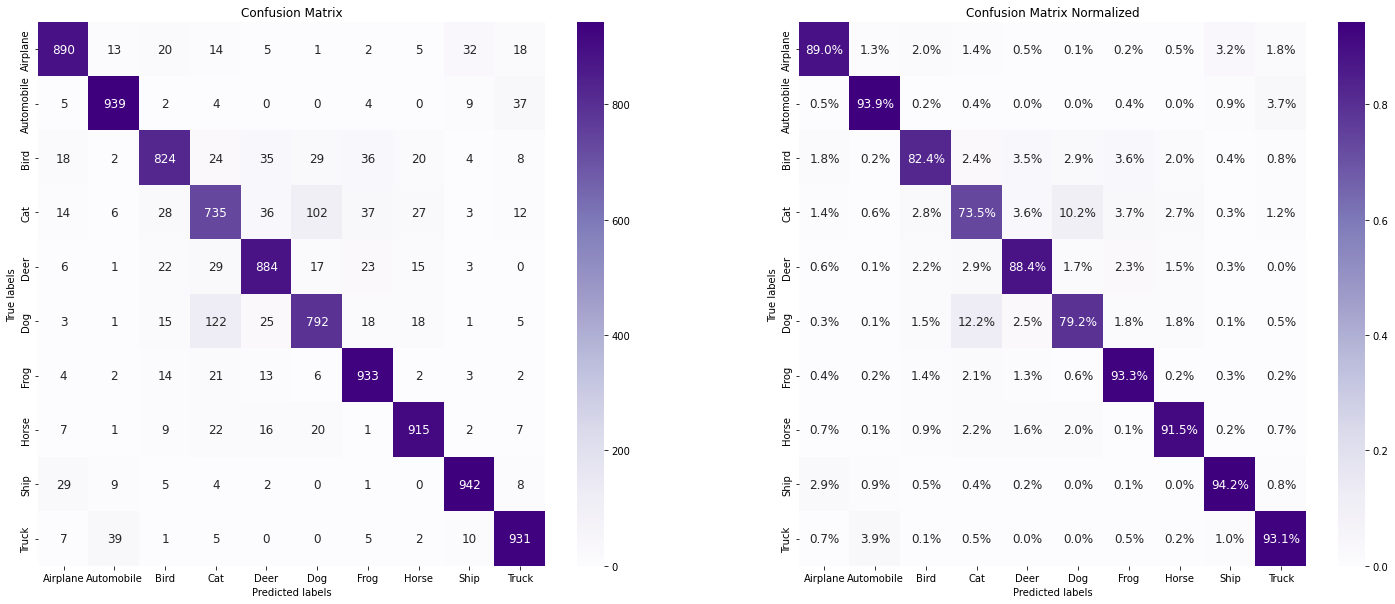

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

plt.figure(figsize=(25,10))
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


ax= plt.subplot(1,2,1)
cf_matrix=confusion_matrix(y_test_actual_labels, y_pred_classes)
sns.heatmap(cf_matrix, 
            annot=True, 
            fmt="d",
            cmap="Purples",
            ax=ax,
            annot_kws={'size': 12}
            )

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels)

ax= plt.subplot(1,2,2)
cf_matrix=confusion_matrix(y_test_actual_labels, y_pred_classes, normalize="true")
sns.heatmap(cf_matrix, 
            annot=True, 
            fmt=".1%",
            cmap="Purples",
            ax=ax,
            annot_kws={'size': 12}
            )

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Normalized') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels)


plt.show()

In [ ]:
print(classification_report(y_test_actual_labels, y_pred_classes, target_names=labels))

              precision    recall  f1-score   support

    Airplane       0.91      0.89      0.90      1000
  Automobile       0.93      0.94      0.93      1000
        Bird       0.88      0.82      0.85      1000
         Cat       0.75      0.73      0.74      1000
        Deer       0.87      0.88      0.88      1000
         Dog       0.82      0.79      0.81      1000
        Frog       0.88      0.93      0.91      1000
       Horse       0.91      0.92      0.91      1000
        Ship       0.93      0.94      0.94      1000
       Truck       0.91      0.93      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

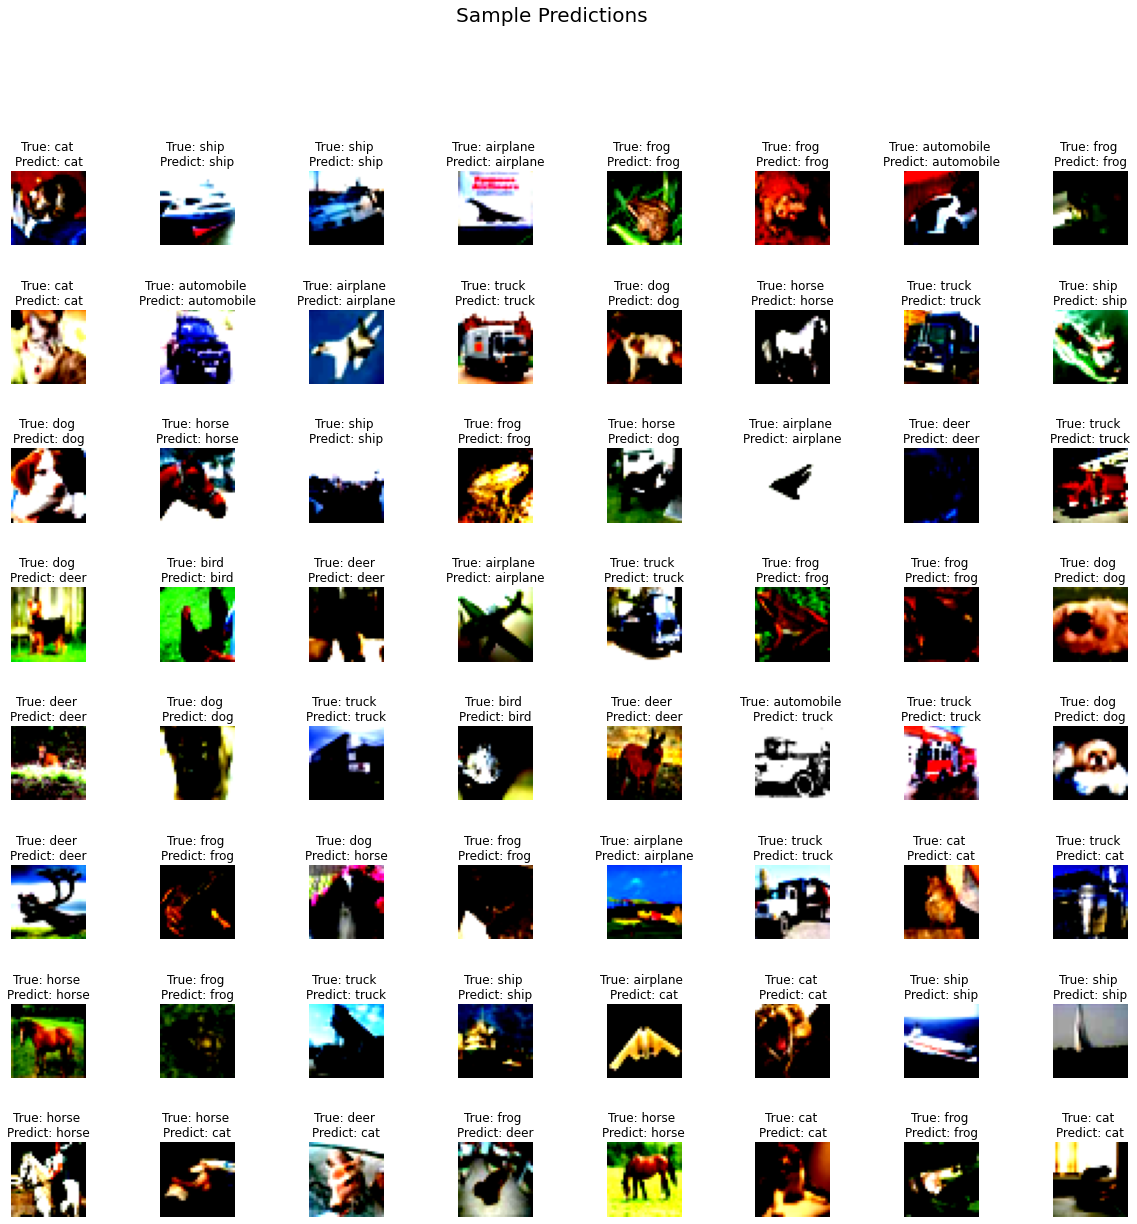

In [ ]:
R = 8
C = 8
fig, axes = plt.subplots(R, C, figsize=(20,20))
fig.suptitle("Sample Predictions", fontsize=20)

axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (classes[y_test_actual_labels[i]], classes[y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

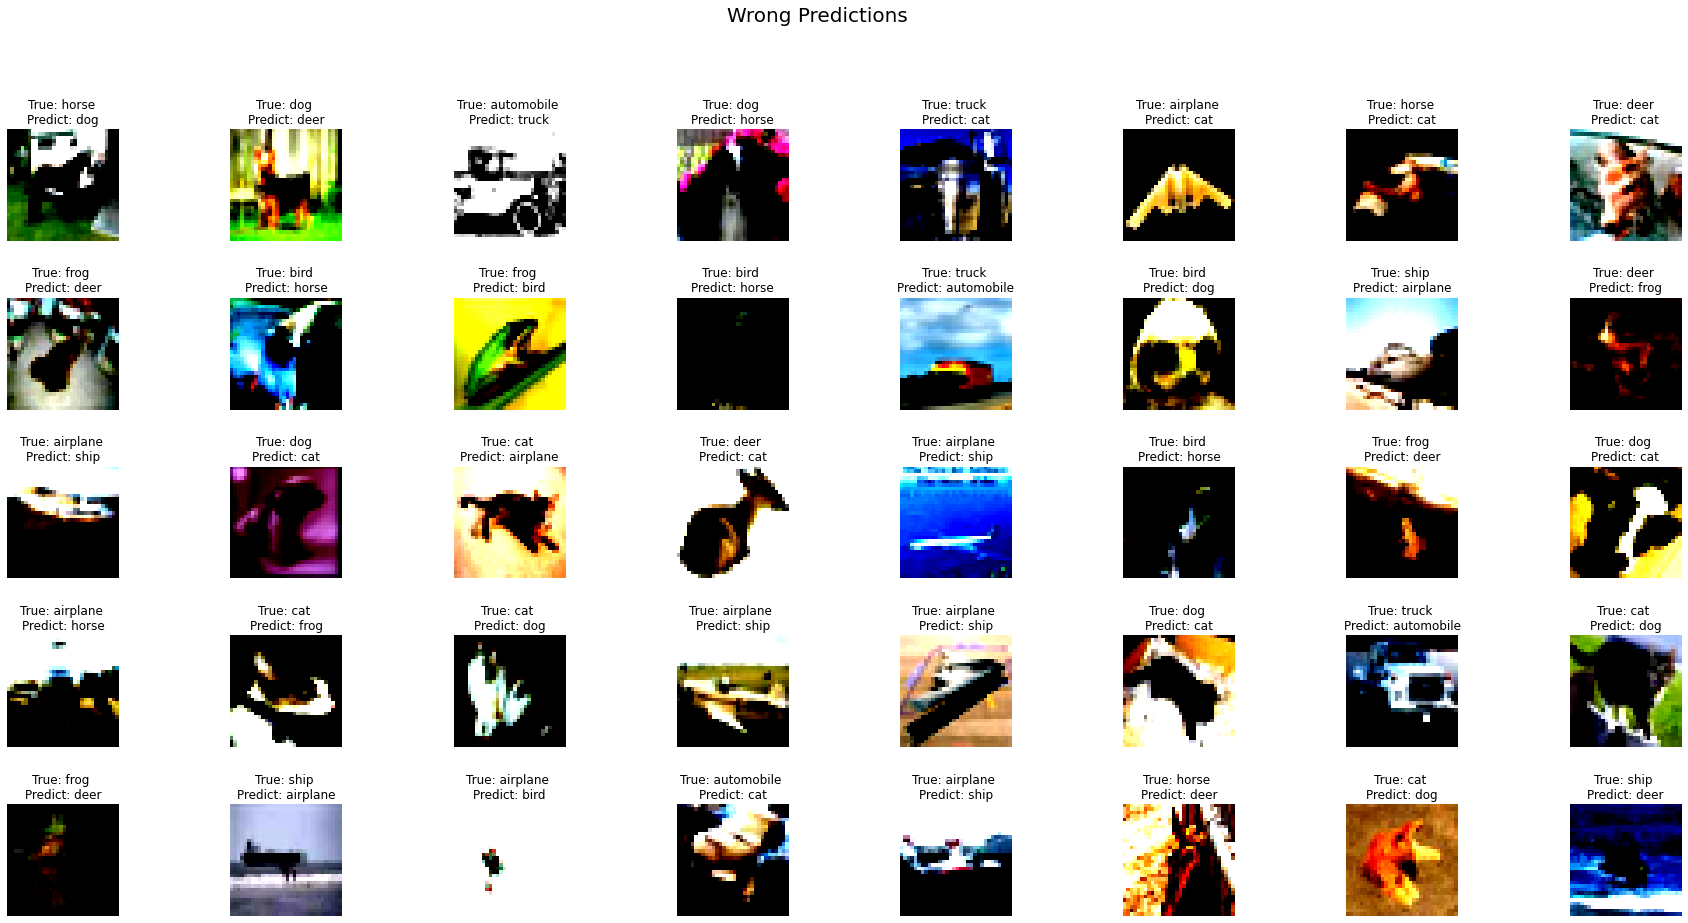

In [ ]:
R = 5
C = 8
fig, axes = plt.subplots(R, C, figsize=(30,15))
fig.suptitle("Wrong Predictions", fontsize=20)

axes = axes.ravel()
count=0

for i in range(0,10000):
  if(errors[i]==True):
    plt.subplots_adjust(wspace=1)
    axes[count].imshow(x_test[i])
    axes[count].set_title("True: %s \nPredict: %s" % (classes[y_test_actual_labels[i]], classes[y_pred_classes[i]]))
    axes[count].axis('off')
    count=count+1

    
  if count>=R*C:
    break
plt.show()  





